## Exercice 3 Partie 2 :Classification des données de CIFAR-10 avec PyTorch


### 1- Chargement des données

In [30]:
#Importation des bibliothèques
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torch.nn.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

### Nature du dataset
L'ensemble de données CIFAR-10 (Institut canadien de recherches avancées) est une collection d'images couramment utilisées pour entraîner des algorithmes d'apprentissage automatique et de vision par ordinateur. Il s'agit de l'un des ensembles de données les plus utilisés pour la recherche sur l'apprentissage automatique. L'ensemble de données CIFAR-10 contient 60 000 images couleur 32 x 32 réparties en 10 classes différentes. Les 10 classes différentes représentent les avions, les voitures, les oiseaux, les chats, les cerfs, les chiens, les grenouilles, les chevaux, les navires et les camions. Il y a 6 000 images de chaque classe.

In [4]:
# Chargement du dataset
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=6,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=6,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [06:37<00:00, 428874.12it/s] 


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


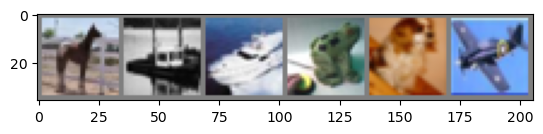

horse  ship  ship  frog   dog plane


In [9]:
#Fonction pour afficher l'image
def imshow(img):
    img = img / 2 + 0.5    
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# recupérer une image aléatoire
dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(6)))

### 2- Architecture du modèle

In [31]:
input_size = 3*32*32
output_size = 10

class CIFAR10FF(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(input_size, 92)
        self.linear2 = nn.Linear(92, 46)
        self.linear3 = nn.Linear(46, output_size)
        
    def forward(self, x):
        out = x.view(x.size(0), -1)
        out = self.linear1(out)
        out = F.relu(out)
        out = self.linear2(out)
        out = F.relu(out)
        out = self.linear3(out)
        return out

model = CIFAR10FF()

print (model)

CIFAR10FF(
  (linear1): Linear(in_features=3072, out_features=92, bias=True)
  (linear2): Linear(in_features=92, out_features=46, bias=True)
  (linear3): Linear(in_features=46, out_features=10, bias=True)
)


## 3- Entrainement du modèle

In [33]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        
        inputs, labels = data
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:    
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Training Completed')

[1,  2000] loss: 1.939
[1,  4000] loss: 1.701
[1,  6000] loss: 1.630
[1,  8000] loss: 1.578
[2,  2000] loss: 1.507
[2,  4000] loss: 1.510
[2,  6000] loss: 1.472
[2,  8000] loss: 1.457
Training Completed


## 4- Evaluation des performances du modèle et prediction

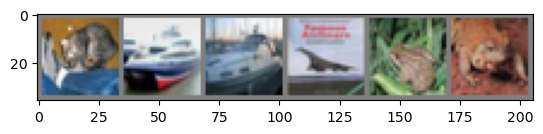

Etiquettes vrais:  cat      ship     ship     plane    frog     frog    
Etiquettes prédits par le modèle:  frog     car      plane    plane    deer     frog    


In [42]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('Etiquettes vrais: ', ' '.join(f'{classes[labels[j]]:8s}' for j in range(6)))

outputs = model(images)
_, predicted = torch.max(outputs, 1)

print('Etiquettes prédits par le modèle: ', ' '.join(f'{classes[predicted[j]]:8s}' for j in range(6)))

In [43]:
correct = 0
total = 0
model.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        
        outputs = model(images)
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Précision du modèle sur les données tests : {100 * correct // total} %')

Précision du modèle sur les données tests : 48 %


Une précision de 48 % sur les données de test est loin d’être comparable à ce que les humains sont capables d’atteindre pour une tâche telle que la classification d’images.

Il existe de nombreuses raisons pour lesquelles notre réseau ne fonctionne pas exceptionnellement bien. Principalement car notre réseau n’est pas très complexe dans son architecture et n’a pas été entrainé fort longtemps.